In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

# Logistic on Attrition Set

In [4]:
data = pd.read_csv("general_data.csv")

In [6]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,131160,1.0,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,41890,0.0,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,193280,1.0,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,83210,3.0,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,23420,4.0,12,8,2,9.0,2,6,0,4


In [8]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [10]:
data.dropna()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,131160,1.0,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,41890,0.0,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,193280,1.0,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,83210,3.0,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,23420,4.0,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,35390,1.0,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,60290,3.0,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,26790,2.0,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,37020,0.0,20,8,0,5.0,4,4,1,2


In [13]:
data.shape

(4410, 23)

In [16]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [18]:
le = preprocessing.LabelEncoder()

In [20]:
data['Attrition'] = le.fit_transform(data['Attrition'])
data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['Gender'] = le.fit_transform(data['Gender'])
data['JobRole'] = le.fit_transform(data['JobRole'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])

In [22]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,131160,1.0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,41890,0.0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,193280,1.0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,83210,3.0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,23420,4.0,12,8,2,9.0,2,6,0,4


In [24]:
dataset = data.drop(['EmployeeCount', 'EmployeeID', 'StandardHours'], axis=1)

In [27]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.0,36.0,43.0,60.0
Attrition,4410.0,0.161224,0.367780,0.0,0.0,0.0,0.0,1.0
BusinessTravel,4410.0,1.607483,0.665304,0.0,1.0,2.0,2.0,2.0
Department,4410.0,1.260544,0.527673,0.0,1.0,1.0,2.0,2.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.0,7.0,14.0,29.0
Education,4410.0,2.912925,1.023933,1.0,2.0,3.0,4.0,5.0
EducationField,4410.0,2.247619,1.331067,0.0,1.0,2.0,3.0,5.0
Gender,4410.0,0.600000,0.489954,0.0,0.0,1.0,1.0,1.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.0,2.0,3.0,5.0
JobRole,4410.0,4.458503,2.461263,0.0,2.0,5.0,7.0,8.0


In [29]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [121]:
dataset2 = dataset.fillna(method = 'ffill')

In [122]:
y = dataset2['Attrition']
x = dataset2.drop(['Attrition'],axis=1)

In [123]:
x.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [124]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int64

In [125]:
x1 = sm.add_constant(x)

In [126]:
Log_Attrition = sm.Logit(y,x1)
result = Log_Attrition.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.393340
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1498
Model:                          Logit   Df Residuals:                     1478
Method:                           MLE   Df Model:                           19
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                  0.1128
Time:                        16:02:07   Log-Likelihood:                -589.22
converged:                       True   LL-Null:                       -664.10
Covariance Type:            nonrobust   LLR p-value:                 2.439e-22
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2291      0.713      0.322      0.748      -1.168       1.626
Age                        -0.0326      0.012     -2.792      0.005      -0.055      -0.010
BusinessTravel             -0.0285      0.112     -0.253      0.800      -0.249       0.192
Department                 -0.3006      0.140     -2.151      0.031      -0.575      -0.027
DistanceFromHome           -0.0018      0.009     -0.194      0.846      -0.020       0.016
Education                  -0.0508      0.073     -0.693      0.488      -0.195       0.093
EducationField             -0.0999      0.057     -1.750      0.080      -0.212       0.012
Gender                      0.0887      0.154      0.577      0.564      -0.212       0.390
JobLevel                   -0.0111      0.067     -0.164      0.869      -0.143       0.121
JobRole                     0.0312      0.031      1.018      0.309      -0.029       0.091
MaritalStatus               0.6042      0.108      5.578      0.000       0.392       0.817
MonthlyIncome           -2.043e-06   1.65e-06     -1.237      0.216   -5.28e-06    1.19e-06
NumCompaniesWorked          0.1098      0.031      3.521      0.000       0.049       0.171
PercentSalaryHike           0.0100      0.020      0.492      0.623      -0.030       0.050
StockOptionLevel           -0.0555      0.088     -0.628      0.530      -0.229       0.118
TotalWorkingYears          -0.0507      0.020     -2.576      0.010      -0.089      -0.012
TrainingTimesLastYear      -0.1521      0.061     -2.507      0.012      -0.271      -0.033
YearsAtCompany              0.0060      0.031      0.192      0.848      -0.055       0.067
YearsSinceLastPromotion     0.1309      0.035      3.709      0.000       0.062       0.200
YearsWithCurrManager       -0.1402      0.038     -3.680      0.000      -0.215      -0.066
===========================================================================================
"""

Factors having p value less than 0.05 are important

# Logistic Regression on Bank Loan set

In [57]:
data1 = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')

In [58]:
data1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [60]:
data2 = data1.drop(['ID', 'ZIP Code'], axis=1)

In [62]:
data2.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [87]:
data2.drop_duplicates(inplace=True)

In [89]:
data2.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [92]:
y2=data2['Personal Loan']
x3=data2[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']]

In [94]:
x4=sm.add_constant(x3)

In [96]:
log_Loan = sm.Logit(y2,x4)

In [98]:
result=log_Loan.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.128720
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 4987
Model:                          Logit   Df Residuals:                     4975
Method:                           MLE   Df Model:                           11
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                  0.5936
Time:                        15:50:06   Log-Likelihood:                -641.93
converged:                       True   LL-Null:                       -1579.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1727      1.645     -7.399      0.000     -15.397      -8.948
Age                   -0.0541      0.061     -0.882      0.378      -0.174       0.066
Experience             0.0642      0.061      1.054      0.292      -0.055       0.184
Income                 0.0545      0.003     20.822      0.000       0.049       0.060
Family                 0.6947      0.074      9.348      0.000       0.549       0.840
CCAvg                  0.1236      0.040      3.117      0.002       0.046       0.201
Education              1.7363      0.115     15.091      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.848      0.396      -0.001       0.002
Securities Account    -0.9371      0.286     -3.280      0.001      -1.497      -0.377
CD Account             3.8181      0.324     11.788      0.000       3.183       4.453
Online                -0.6724      0.157     -4.280      0.000      -0.980      -0.364
CreditCard            -1.1181      0.205     -5.454      0.000      -1.520      -0.716
======================================================================================
"""

Factors having p value less than 0.05 are important 

# Linear Regression on House Data

In [101]:
df1 = pd.read_excel('Linear Regression.xlsx')

In [103]:
df1.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [105]:
df1.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [109]:
df1.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

In [111]:
df1.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


In [113]:
df1.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


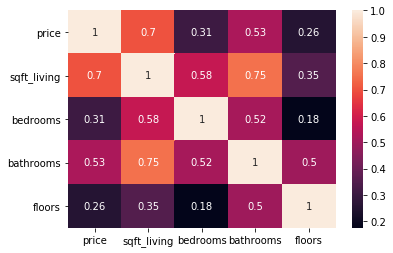

In [116]:
sn.heatmap(df1.corr(), annot = True)

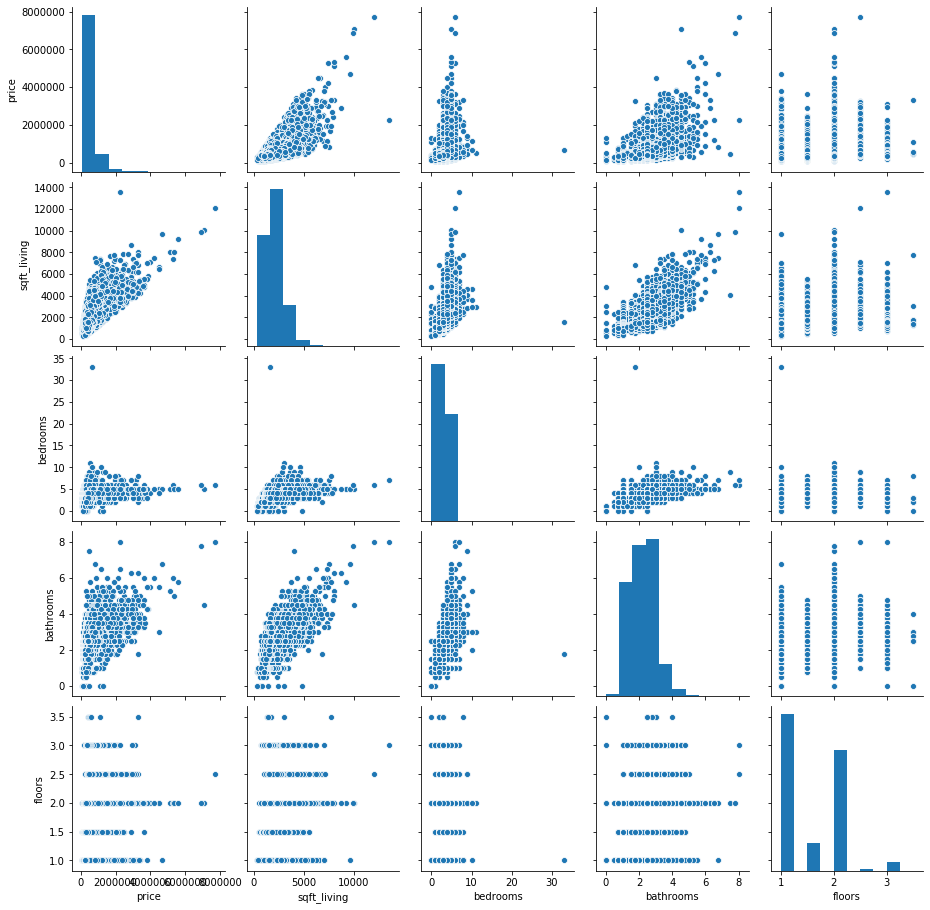

In [118]:
sn.pairplot(df1)

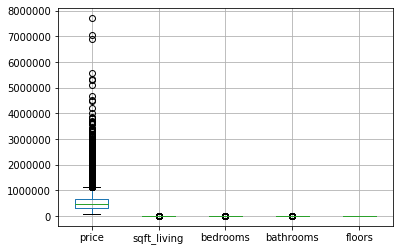

In [127]:
df1.boxplot()

# Linear Regression Between Price and Sq_Ft Living

In [129]:
price = df1.iloc[:, :1]
sqft_living = df1.iloc[:,1:2]

Text(0, 0.5, 'Area in squarefeet')

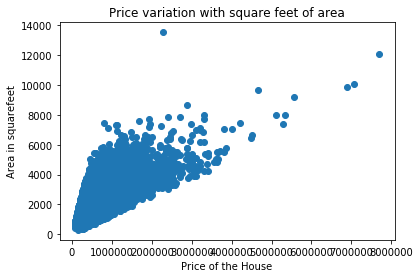

In [131]:
plt.scatter(price, sqft_living)
plt.title('Price variation with square feet of area')
plt.xlabel('Price of the House')
plt.ylabel('Area in squarefeet')

In [133]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(price, sqft_living, test_size = 0.26, random_state = 0)

In [135]:
model = LinearRegression()
model.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
model.coef_

array([[0.00176886]])

In [140]:
y_pred1 = model.predict(X_test1)

Text(0, 0.5, 'Area in squarefeet')

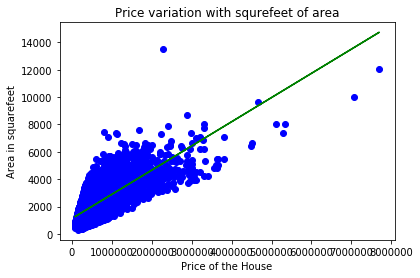

In [143]:
plt.scatter(X_train1, y_train1, color = 'blue')
plt.plot(X_train1, model.predict(X_train1), color = 'green')
plt.title('Price variation with squrefeet of area')
plt.xlabel('Price of the House')
plt.ylabel('Area in squarefeet')

Text(0, 0.5, 'Area in squarefeet')

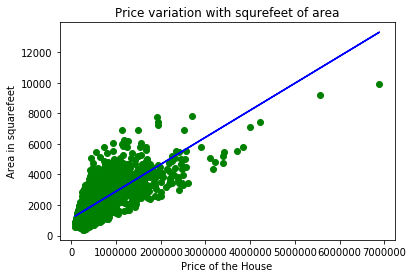

In [145]:
plt.scatter(X_test1,y_test1, color = 'green')
plt.plot(X_test1, model.predict(X_test1), color = 'blue')
plt.title('Price variation with squrefeet of area')
plt.xlabel('Price of the House')
plt.ylabel('Area in squarefeet')

In [147]:
RMSE1 = np.sqrt(mean_squared_error(y_test1, y_pred1))
r_square1 = r2_score(y_test1, y_pred1)

print(f'The R-Square value is....{r_square1}')
print(f'The RMSE value is........{RMSE1}')

The R-Square value is....0.4833141787918366
The RMSE value is........646.3343317662756


In [150]:
unseen_pred1 = model.predict(np.array([[7368]]))
print(f'The unseen for the given x is....{unseen_pred1}')

The unseen for the given x is....[[1136.01142029]]


# LINEAR REGRESSION MODEL BETWEEN PRICE AND BEDROOMS:-

In [152]:
bedroom = df1.iloc[:,2:3]

Text(0, 0.5, 'No of bedroom')

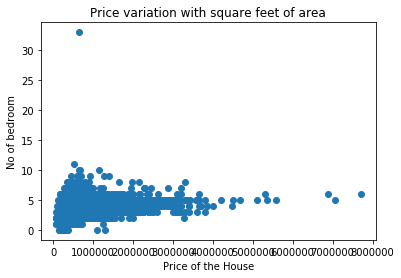

In [154]:
plt.scatter(price, bedroom)
plt.title('Price variation with square feet of area')
plt.xlabel('Price of the House')
plt.ylabel('No of bedroom')

In [166]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(price, bedroom, test_size = 0.26, random_state = 0)

In [167]:
model2 = LinearRegression()
model2.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
model2.coef_

array([[8.04337227e-07]])

In [176]:
y_pred2 = model2.predict(X_test2)

Text(0, 0.5, 'No of bedroom')

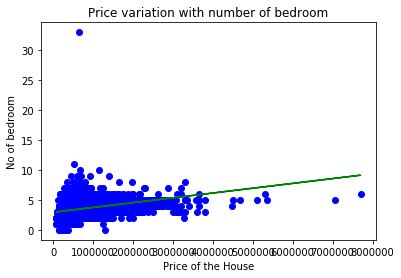

In [177]:
plt.scatter(X_train2, y_train2, color = 'blue')
plt.plot(X_train1, model2.predict(X_train2), color = 'green')
plt.title('Price variation with number of bedroom')
plt.xlabel('Price of the House')
plt.ylabel('No of bedroom')

Text(0, 0.5, 'Number of bedroom')

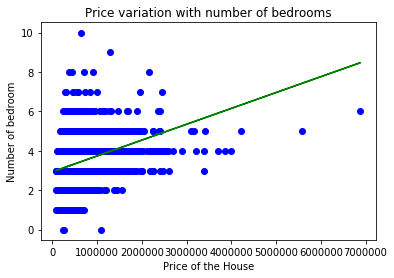

In [180]:
plt.scatter(X_test2, y_test2, color = 'blue')
plt.plot(X_test2, model2.predict(X_test2), color = 'green')
plt.title('Price variation with number of bedrooms')
plt.xlabel('Price of the House')
plt.ylabel('Number of bedroom')

In [181]:
RMSE2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
r_square2 = r2_score(y_test2, y_pred2)

print(f'The R-Square value is....{r_square2}')
print(f'The RMSE value is........{RMSE2}')

The R-Square value is....0.0838071259952835
The RMSE value is........0.8505931821610008


# Multiple Regression

In [193]:
x = df1.iloc[:,1:5]
y = df1.iloc[:,:1]

In [202]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(x,y,test_size=0.3, random_state=0) 

In [203]:
model_ml = LinearRegression(normalize=True)

In [204]:
model_ml

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [206]:
model_ml.fit(X_train3,y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [208]:
y_pred3 = model_ml.predict(X_test3)

In [211]:
RMSE3 = np.sqrt(mean_squared_error(y_test3, y_pred3))
r_square3 = r2_score(y_test3, y_pred3)

print(f'The R-Square value is....{r_square3}')
print(f'The RMSE value is........{RMSE3}')

The R-Square value is....0.506328262165046
The RMSE value is........260340.45808582954
